In [117]:
import numpy as np
import pandas as pd

In [118]:
year = 2020
country = "United States"
geography = "state"

In [119]:
output = []
for method in ["std", "skew", "kurtosis", "er", "wstd"]: #, "divisiveness"
    try:
        path = f"data_output/{country}/{year}_divisiveness_{geography}_{method}.csv.gz"
        tmp = pd.read_csv(path, compression="gzip")
        tmp["method"] = method
        output.append(tmp)
    except:
        pass
    
df = pd.concat(output, ignore_index=True)

In [120]:
df_location = pd.read_csv(f"data_output/{country}/{year}_first_round_location.csv.gz", compression="gzip")

df_fround = pd.read_csv(f"data_output/{country}/{year}_first_round.csv.gz", compression="gzip")
df_fround = pd.merge(df_fround, df_location[["polling_id", geography]], on="polling_id")
df_fround = df_fround.groupby([geography, "candidate"]).agg({"value": "sum"})
df_fround["value"] = df_fround.groupby(level=[0]).apply(lambda x: x/x.sum())
df_fround = df_fround.reset_index()
df_fround["method"] = "% First Round"
df_fround.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_24324\1860696723.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_fround["value"] = df_fround.groupby(level=[0]).apply(lambda x: x/x.sum())


,state,candidate,value,method
0,ALABAMA,DONALD J TRUMP,0.620316,% First Round
1,ALABAMA,JOSEPH R BIDEN JR,0.365700,% First Round
2,ALABAMA,OTHER,0.013984,% First Round
3,ALASKA,DONALD J TRUMP,0.531229,% First Round
4,ALASKA,JO JORGENSEN,0.024882,% First Round


In [121]:
# df_location = pd.read_csv(f"data_output/{country}/{year}_first_round_location.csv.gz", compression="gzip")

# df_runoff = pd.read_csv(f"data_output/{country}/{year}_runoff.csv.gz", compression="gzip")
# df_runoff = pd.merge(df_runoff, df_location[["polling_id", geography]], on="polling_id")
# df_runoff = df_runoff.groupby([geography, "candidate"]).agg({"value": "sum"})
# df_runoff["value"] = df_runoff.groupby(level=[0]).apply(lambda x: x/x.sum())
# df_runoff = df_runoff.reset_index()
# df_runoff["method"] = "% Runoff"
# df_runoff.head()

In [122]:
# candidate_a, candidate_b = df_runoff.candidate.unique()

In [123]:
# dv = df_runoff.pivot(index=geography, columns="candidate", values="value").reset_index()
# dv["method"] = "Dv. Runoff"
# dv["value"] = 1 - np.abs(dv[candidate_a] - dv[candidate_b])
# # dv[[geography, "method", "value"]]

In [124]:
# df = pd.concat([df, df_fround])
methods = {
    "wstd": "EPI",
    "er": "Esteban-Ray",
    "skew": "Skewness",
    "kurtosis": "Kurtosis",
    # "divisiveness": "Divisiveness",
    "std": "Dispersion"
    # "std_rank": "Std. Deviation (Rank)"
}
df["method"] = df["method"].replace(methods)


In [125]:
aa = df.groupby([geography, "method"]).agg({"value": "mean"}).reset_index()
aa["value"] = np.sqrt(aa["value"])

dd = pd.concat([
    aa,
    # dv[[geography, "method", "value"]],
])

# dd = dd[~dd[geography].str.contains("Z")]
# dd = dd[~dd[geography].isin(["ANTARTICA CHILENA", "ISLA DE PASCUA", "DEL TAMARUGAL"])]

C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [126]:
# dd[dd["method"] == "Kurtosis"].sort_values("value").dropna()

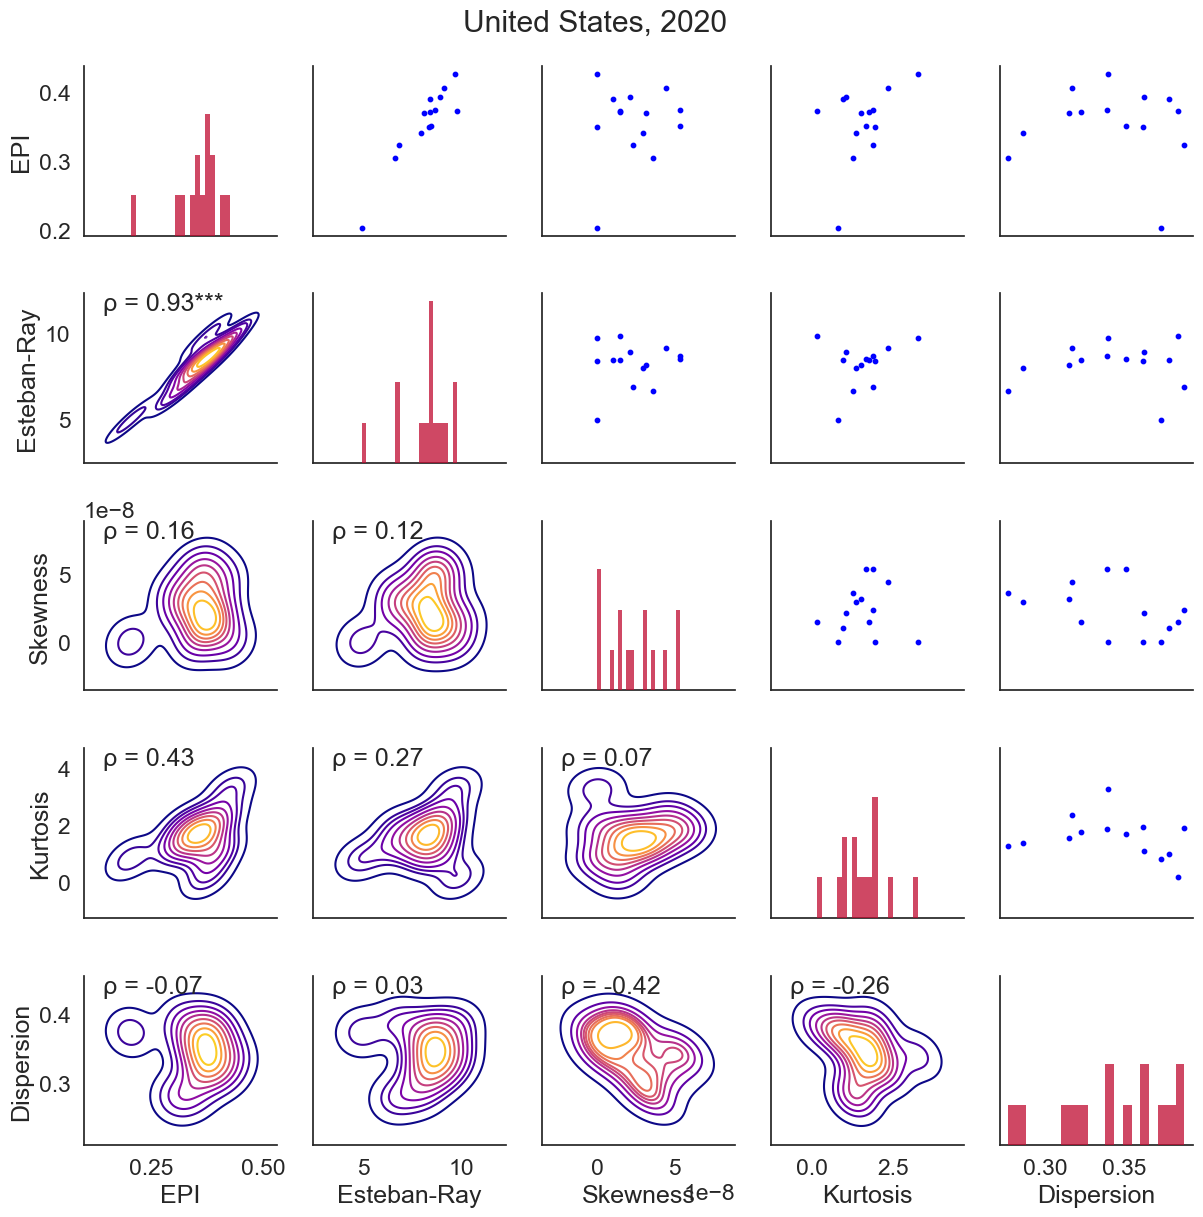

In [127]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5, style="white")

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    note = ""
    if _ < 0.001:
        note = "***"
    elif _ < 0.05:
        note = "**"
    elif _ < 0.1:
        note = "*"

    ax.annotate("ρ = {:.2f}{}".format(r, note),
                xy=(.1, .9), xycoords=ax.transAxes)

data = dd.pivot(index=[geography], columns="method", values="value").dropna()
data = data[methods.values()]

g = sns.PairGrid(data)
g.map_upper(plt.scatter, color="blue", s=10)
g.map_diag(sns.histplot, kde=False, lw=0, bins=20, color="#BF0A30")
g.map_lower(sns.kdeplot, cmap="plasma")
g.map_lower(corrfunc)
g.fig.suptitle(f"{country}, {year}")

g.fig.tight_layout()

In [128]:
dd[dd["method"] == "Esteban-Ray"].sort_values("value", ascending=False)

,state,method,value
102,MARYLAND,Esteban-Ray,10.392222
222,UTAH,Esteban-Ray,9.782421
127,MISSOURI,Esteban-Ray,9.666074
187,OREGON,Esteban-Ray,9.584727
52,GEORGIA,Esteban-Ray,9.531874
67,ILLINOIS,Esteban-Ray,9.529604
37,DELAWARE,Esteban-Ray,9.298404
92,LOUISIANA,Esteban-Ray,9.124680
157,NEW MEXICO,Esteban-Ray,9.116761
212,TENNESSEE,Esteban-Ray,9.092223


In [129]:
dd[dd["method"] == "EPI"].sort_values("value", ascending=False)

,state,method,value
51,GEORGIA,EPI,0.434385
126,MISSOURI,EPI,0.427050
101,MARYLAND,EPI,0.414604
91,LOUISIANA,EPI,0.412202
211,TENNESSEE,EPI,0.406521
231,VIRGINIA,EPI,0.406270
121,MISSISSIPPI,EPI,0.403420
66,ILLINOIS,EPI,0.397674
1,ALABAMA,EPI,0.394144
191,PENNSYLVANIA,EPI,0.393310


In [130]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# from sklearn.linear_model import LogisticRegression
# from sklearn.decomposition import PCA

# # intialize pca and logistic regression model
# pca = PCA(n_components=5)
# # lr = LogisticRegression(multi_class='auto', solver='liblinear')
# X = df_fround.pivot(index=geography, columns="candidate", values="value")
# # fit and transform data
# pca.fit(X)